Em breve um cabeçalho de identificação do trabalho aqui

In [ ]:
!pip install faiss-cpu==1.7.4 mistralai

In [ ]:
import os
import time
import csv
import pandas as pd
import numpy as np

import seaborn as sns
from IPython.display import display, HTML

import faiss
from faiss import write_index, read_index
from mistralai import Mistral

## **Parte 1: Download dos Dados**

In [ ]:
#foram selecionados os 4 menores datasets (linhas x colunas) sobre transporte
#ids dos datasets: '002_Titanic', '016_Holiday', '061_Disneyland', '009_Central'

for id_dataset in ['002_Titanic', '016_Holiday', '061_Disneyland', '009_Central']:
  #all.parquet: todos os dados
  df_all = pd.read_parquet("hf://datasets/cardiffnlp/databench/data/{}/all.parquet".format(id_dataset))
  #salvar localmente como csv
  df_all.to_csv("training_all/{}_all.csv".format(id_dataset), sep = ";")

  #sample.parquet: amostra
  df_sample = pd.read_parquet("hf://datasets/cardiffnlp/databench/data/{}/sample.parquet".format(id_dataset))
  #salvar localmente como csv
  df_sample.to_csv("training_sample/{}_sample.csv".format(id_dataset), sep = ";")

  #qa.parquet: dados Q&A
  df_qa = pd.read_parquet("hf://datasets/cardiffnlp/databench/data/{}/qa.parquet".format(id_dataset))
  #salvar localmente como csv
  df_qa.to_csv("questions/{}_qa.csv".format(id_dataset), sep = ";")

**Visão Geral dos Dados: 002_Titanic**

In [ ]:
#dataset completo (versão all)
df = pd.read_csv("training_all/002_Titanic_all.csv", sep = ";")
print(df.shape)
#o campo Unnamed é um Id sem rótulo
print(df.columns.to_list())

(887, 9)
['Unnamed: 0', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings_Spouses Aboard', 'Parents_Children Aboard', 'Fare']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
0,0,False,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,71.2833
2,2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,4,False,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
#dataset menor (versão sample)
df = pd.read_csv("training_sample/002_Titanic_sample.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 8)
['Unnamed: 0', 'Age', 'Siblings_Spouses Aboard', 'Sex', 'Name', 'Pclass', 'Fare', 'Survived']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,Age,Siblings_Spouses Aboard,Sex,Name,Pclass,Fare,Survived
0,0,69.0,0,male,Mr. Samuel Beard Risien,3,14.50,False
1,1,57.0,0,male,Rev. Charles Leonard Kirkland,2,12.35,False
2,2,22.0,0,male,Mr. Eliezer Gilinski,3,8.05,False
3,3,49.0,0,male,Mr. Alfred Johnson,3,0.00,False
4,4,39.0,0,male,Mr. Richard Otter,2,13.00,False


In [ ]:
#dataset com as perguntas
df = pd.read_csv("questions/002_Titanic_qa.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 8)
['Unnamed: 0', 'question', 'answer', 'type', 'columns_used', 'column_types', 'sample_answer', 'dataset']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,question,answer,type,columns_used,column_types,sample_answer,dataset
0,0,Did any children below the age of 18 survive?,True,boolean,"[Age, Survived]","['number[UInt8]', 'boolean']",True,002_Titanic
1,1,Were there any passengers who paid a fare of more than $500?,True,boolean,[Fare],['number[double]'],False,002_Titanic
2,2,Is every passenger's name unique?,True,boolean,[Name],['text'],True,002_Titanic
3,3,Were there any female passengers in the 3rd class who survived?,True,boolean,"[Sex, Pclass, Survived]","['category', 'number[uint8]', 'boolean']",True,002_Titanic
4,4,How many unique passenger classes are present in the dataset?,3,number,[Pclass],['number[uint8]'],3,002_Titanic


**Visão Geral dos Dados: 016_Holiday**

In [ ]:
#dataset completo (versão all)
df = pd.read_csv("training_all/016_Holiday_all.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(4888, 21)
['Unnamed: 0', 'CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
#dataset menor (versão sample)
df = pd.read_csv("training_sample/016_Holiday_sample.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 21)
['Unnamed: 0', 'CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200144,0,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,1,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,2,202098,0,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,3,204738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,4,202858,1,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [ ]:
#dataset com as perguntas
df = pd.read_csv("questions/016_Holiday_qa.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 8)
['Unnamed: 0', 'question', 'answer', 'type', 'columns_used', 'column_types', 'sample_answer', 'dataset']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,question,answer,type,columns_used,column_types,sample_answer,dataset
0,0,Is there a customer with 'Large Business' as their occupation?,True,boolean,['Occupation'],['category'],True,016_Holiday
1,1,Are there customers with 'King' as their pitched product?,True,boolean,['ProductPitched'],['category'],True,016_Holiday
2,2,Is there a customer with designation 'VP'?,True,boolean,['Designation'],['category'],True,016_Holiday
3,3,Is 'Unmarried' listed as a marital status in the dataset?,True,boolean,['MaritalStatus'],['category'],True,016_Holiday
4,4,How many customers are there in the dataset?,4888,number,NaN,[],20,016_Holiday


**Visão Geral dos Dados: 061_Disneyland**

In [ ]:
#dataset completo (versão all)
df = pd.read_csv("training_all/061_Disneyland_all.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(42656, 7)
['Unnamed: 0', 'Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong
1,1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong
2,2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong
3,3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) Regardless, kids will love it.",Disneyland_HongKong
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Disneyland_HongKong


In [ ]:
#dataset menor (versão sample)
df = pd.read_csv("training_sample/061_Disneyland_sample.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 6)
['Unnamed: 0', 'Rating', 'Reviewer_Location', 'Year_Month', 'Branch', 'Review_ID']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,Rating,Reviewer_Location,Year_Month,Branch,Review_ID
0,0,5,Malta,2017-9,Disneyland_Paris,540713188
1,1,1,Canada,2011-10,Disneyland_California,119781124
2,2,5,Australia,2018-4,Disneyland_HongKong,576395715
3,3,5,United States,2015-9,Disneyland_California,310041955
4,4,4,United States,2013-11,Disneyland_California,184009554


In [ ]:
#dataset com as perguntas
df = pd.read_csv("questions/061_Disneyland_qa.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 8)
['Unnamed: 0', 'question', 'answer', 'type', 'columns_used', 'column_types', 'sample_answer', 'dataset']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,question,answer,type,columns_used,column_types,sample_answer,dataset
0,0,Are all the reviews from Australia positive (rating > 3)?,False,boolean,"['Reviewer_Location', 'Rating']","['category', 'number[uint8]']",True,061_Disneyland
1,1,Is Disneyland_HongKong the most reviewed branch?,False,boolean,['Branch'],['category'],False,061_Disneyland
2,2,Are there any reviews with a rating of 1?,True,boolean,['Rating'],['number[uint8]'],True,061_Disneyland
3,3,Does every reviewer location have at least one review with a rating of 5?,False,boolean,"['Reviewer_Location', 'Rating']","['category', 'number[uint8]']",True,061_Disneyland
4,4,How many unique reviewer locations are there?,162,number,['Reviewer_Location'],['category'],9,061_Disneyland


**Visão Geral dos Dados: 009_Central**

In [ ]:
#dataset completo (versão all)
df = pd.read_csv("training_all/009_Central_all.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(56245, 7)
['Unnamed: 0', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TMIN', 'TMAX']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,0,1869-01-01 00:00:00+00:00,0.75,9.0,NaN,19.0,29.0
1,1,1869-01-02 00:00:00+00:00,0.03,0.0,NaN,21.0,27.0
2,2,1869-01-03 00:00:00+00:00,0.00,0.0,NaN,27.0,35.0
3,3,1869-01-04 00:00:00+00:00,0.18,0.0,NaN,34.0,37.0
4,4,1869-01-05 00:00:00+00:00,0.05,0.0,NaN,37.0,43.0


In [ ]:
#dataset menor (versão sample)
df = pd.read_csv("training_sample/009_Central_sample.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 6)
['Unnamed: 0', 'TMIN', 'PRCP', 'DATE', 'SNWD', 'TMAX']


In [ ]:
display(HTML(df.head().to_html()))

,Unnamed: 0,TMIN,PRCP,DATE,SNWD,TMAX
0,0,60.0,0.00,1982-07-02,0.0,80.0
1,1,18.0,0.00,1945-02-03,4.0,32.0
2,2,73.0,0.66,1891-07-24,NaN,81.0
3,3,50.0,0.00,1991-09-22,0.0,70.0
4,4,64.0,0.01,1898-09-15,NaN,72.0


In [ ]:
#dataset com as perguntas
df = pd.read_csv("questions/009_Central_qa.csv", sep = ";")
print(df.shape)
print(df.columns.to_list())

(20, 8)
['id', 'question', 'answer', 'type', 'columns_used', 'column_types', 'sample_answer', 'dataset']


In [ ]:
display(HTML(df.head().to_html()))

,id,question,answer,type,columns_used,column_types,sample_answer,dataset
0,0,There were no days when the precipitation was greater than 5 inches.,True,boolean,[PRCP],['number[double]'],True,009_Central
1,1,All recorded temperatures are above freezing point.,False,boolean,"[TMIN, TMAX]","['number[Int8]', 'number[UInt8]']",False,009_Central
2,2,There were no days when the snow depth was more than 10 inches.,True,boolean,[SNWD],['number[UInt8]'],True,009_Central
3,3,There were no days when the maximum temperature was below freezing point.,False,boolean,[TMAX],['number[UInt8]'],False,009_Central
4,4,What is the highest recorded precipitation in inches?,8.28,number,[PRCP],['number[double]'],0.66,009_Central


## **Parte 2: Gerar e Armazenar Embeddings**
Neste bloco são implementadas as etapas abaixo:
- Os dados tabulares dos datasets (all) são convertidos para texto no formato "[coluna] is [valor]" e formato "the complete list of [coluna] is [coluna values]"
- O texto é quebrado em um conjunto de chunks de tamanho 2048;
- É gerado o embedding de cada chunk com o modelo mistral-embed;
- Os embeddings gerados são armazenados na estrutura vetorial do Faiss (Facebook AI Similarity Search)

Para a Tarefa 1 são usados os datasets maiores, no formato *_all.csv.
Para a Tarefa 2 são usados os datasets maiores, no formato *_sample.csv.

In [ ]:
api_key= "<api key aqui>"
client = Mistral(api_key=api_key)

In [ ]:
def convert_table_to_text(directory_path, filename, text = ""):
  directory_files = os.listdir(directory_path)
  df = pd.read_csv(os.path.join(directory_path, filename), sep = ";")

  list_columns = df.columns.to_list()

  #convert rows to text
  for index, row in df.iterrows():
      for i in range(0, len(list_columns)):
          #concat(nome_coluna, valor) no formato <coluna> is <valor>
          text = text + "{} is {} ".format(list_columns[i], row[list_columns[i]])
      #adiciona após o último concat, como se fosse uma sentença
      text = text + "."

  #converte as colunas para texto
  for col in list_columns:
    text = text + "the complete list of {} is {}. ".format(col, df[col].tolist())

  return text

In [ ]:
def gera_chunks(text, chunk_size = 2048):
  chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

  return chunks

In [ ]:
def get_text_embedding(input):
  embeddings_batch_response = client.embeddings.create(
    model="mistral-embed",
    inputs=input
  )
  return embeddings_batch_response.data[0].embedding

In [ ]:
def save_index(text_embeddings, index_path):
  d = text_embeddings.shape[1]
  index = faiss.IndexFlatL2(d)
  index.add(text_embeddings)

  write_index(index, index_path)

  return index

In [ ]:
def gera_embeddings(directory_path, text = ""):
  #directory_files = os.listdir(directory_path)

  #for filename in directory_files:
    #ajeitar isso aqui
    filename = '061_Disneyland_sample.csv'
    text = convert_table_to_text(directory_path, filename)
    chunks = gera_chunks(text)
    print(len(chunks))

    embeddings = []
    for chunk in chunks:
      embeddings.append(get_text_embedding(chunk))
      #sleep para não estourar o limite de chamadas de API (Error 429)
      time.sleep(2)

    text_embeddings = np.array(embeddings)
    return text_embeddings, filename

#para a Tarefa 1:
#directory_path = '/content/training_all/'
#para a Tarefa 2:
directory_path = '/content/training_sample/'

text_embeddings, filename = gera_embeddings(directory_path)

#para a Tarefa 1:
#index_path = "/content/indexes/{}_all.index".format(filename)
#para a Tarefa 2:
index_path = "/content/indexes/{}_sample.index".format(filename)

index = save_index(text_embeddings, index_path)

3


## **Parte 3: Responder as Perguntas**
Neste bloco são implementadas as etapas abaixo:
- Embedding das perguntas de cada dataset (20 perguntas para cada)
- Definição de um template de prompt para responder as perguntas
- Execução do prompt por meio de uma chamada de chat e duas versões do modelo mistral: mistral-large-latest e mistral-small-latest
- mistral-small-latest: no momento da implementação deste código, aponta para a versão Mistral Small v24.09 (mistral-small-2409) de 22 bilhões de parâmetros.
- mistral-large-latest: no momento da implementação deste código, aponta para a versão Mistral Large v24.11 (mistral-large-2411) de 123 bilhões de parâmetros.

Fontes: https://mistral.ai/news/september-24-release/, https://docs.mistral.ai/getting-started/models/models_overview/ e https://mistral.ai/news/mistral-large-2407/

In [ ]:
#gera embedding das perguntas
def gera_embeddings_perguntas(list_questions):
  list_questions_emb = []

  for question in list_questions:
    question_embeddings = np.array([get_text_embedding(question)])
    list_questions_emb.append(question_embeddings)
    time.sleep(2)

  return list_questions_emb

In [ ]:
#todas as perguntas de todos os datasets estão ordenadas de acordo com o tipo de resposta
#boolean, number, category, list of categories, and list of numbers

def define_complement(type_answers):
  if type_answers == "boolean":
    complement = "The answer must be only a single boolean value."
  elif type_answers == "number":
    complement = "The answer must be only a single number."
  elif type_answers == "category":
    complement = "The answer must be only a single category."
  elif type_answers == "list[category]":
    complement = "The answer must be short, only a list containing all the categories separated by commas."
  else:
    complement = "The answer must be short, only a list containing all the numbers separated by commas."

  return complement

In [ ]:
def get_template(retrieved_chunk, question, complement):
    prompt = f"""
    Context information is below.
    ---------------------
    {retrieved_chunk}
    ---------------------
    Given the context information and not prior knowledge, answer the query. If you cannot provide an answer, say 'I don't know'.
    Query: {question}. {complement}.
    Answer:
    """

    return prompt

In [ ]:
def run_mistral(user_message, model):
    messages = [
        {
            "role": "user", "content": user_message
        }
    ]
    chat_response = client.chat.complete(
        model=model,
        messages=messages
    )
    return (chat_response.choices[0].message.content)

In [ ]:
def executa_qa(list_questions_emb, list_questions, list_type_answers, chunks, model, index_):
  list_respostas = []
  list_chunks = []

  for idx, question_embeddings in enumerate(list_questions_emb):
    D, I = index_.search(question_embeddings, k=2)

    retrieved_chunk = [chunks[i] for i in I.tolist()[0]]
    list_chunks.append(retrieved_chunk)

    complement = define_complement(list_type_answers[idx])
    prompt = get_template(retrieved_chunk, list_questions[idx], complement)

    answer = run_mistral(prompt, model)
    list_respostas.append(answer)

    time.sleep(3)

  return list_respostas,list_chunks

In [ ]:
#carregar o arquivo de perguntas aqui
list_questions = []
list_type_answers = []
list_correct_answers = []

directory_path = '/content/questions/009_Central_qa.csv'
index_ = read_index("/content/indexes/central_all.index")
#model = "mistral-small-latest"
model = "mistral-large-latest"

#for filename in directory_files:
df = pd.read_csv(directory_path, sep = ";")
for idx, row in df.iterrows():
  list_questions.append(row['question'])
  list_type_answers.append(row['type'])
  list_correct_answers.append(row['answer'])
  #list_correct_answers.append(row['sample_answer'])

list_questions_emb = gera_embeddings_perguntas(list_questions)

text = convert_table_to_text('/content/training_all/', '009_Central_all.csv')
chunks = gera_chunks(text)

list_respostas, list_chunks = executa_qa(list_questions_emb, list_questions, list_type_answers, chunks, model, index_)

In [ ]:
for idx, resp in enumerate(list_respostas):
    perg = list_questions[idx]
    resp_correta = list_correct_answers[idx]

    with open('answers/resps_central_all_mlarge2.csv', 'a', newline='') as file:
        writer = csv.writer(file, delimiter=';')
        if idx == 0:
            writer.writerow(["Id", "Pergunta", "Resposta Modelo", "Resposta Correta"])

        writer.writerow([idx, perg, resp, resp_correta])

In [ ]:
#Titanic:
#print(len(text)) -> 223029
#print(len(chunks)) -> 109

#Central:
#print(len(text)) -> 10135745
#print(len(chunks)) -> 4950

#Holiday:
#print(len(text)) -> 2999863
#print(len(chunks)) -> 1465

#Disneyland:
#print(len(text)) -> 69226898
#print(len(chunks)) -> 33803

2999863
1465


## **Parte 4: Avaliação dos Resultados**

- Para fazer a avaliação dos resultados retornados pelo mistral, serão utilizadas as métricas ROUGE, String Presence e BERTScore
- A implementação destas métricas foi feita com o framework Ragas [https://docs.ragas.io/en/stable/] e com a lib bert-score [https://pypi.org/project/bert-score/]

In [ ]:
!pip install ragas
!pip install rouge_score
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.

In [ ]:
#legenda para os gráficos

legenda = ['BOOLEAN','BOOLEAN','BOOLEAN','BOOLEAN',
         'NUMBER','NUMBER','NUMBER','NUMBER',
         'CATEGORY','CATEGORY','CATEGORY','CATEGORY',
         'LIST CATEGORY','LIST CATEGORY','LIST CATEGORY','LIST CATEGORY',
         'LIST NUMBER','LIST NUMBER','LIST NUMBER','LIST NUMBER']

In [ ]:
import numpy as np
from bert_score import BERTScorer

from rouge_score import rouge_scorer

def calc_rouge(list_respostas, list_correct_answers):
  #rouge1: 1-gram scoring
  #rouge2: 2-gram scoring
  #rougeL: sentence level
  scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

  list_f1 = []
  p = []
  r = []
  f1 = []

  for i in range(0,len(list_respostas)):
    scores = scorer.score(list_correct_answers[i], list_respostas[i])
    p.append(np.mean(scores['rouge1'].precision))
    r.append(np.mean(scores['rouge1'].recall))
    f1.append(np.mean(scores['rouge1'].fmeasure))
    list_f1.append(np.mean(f1))

  return np.mean(p), np.mean(r), np.mean(f1), list_f1

def calc_bertscore(list_respostas, list_correct_answers):
  scorer = BERTScorer(model_type='bert-base-uncased')
  precision, recall, F1 = scorer.score(list_respostas, list_correct_answers)

  return precision.mean().item(), recall.mean().item(), F1.mean().item(), F1.tolist()

## **Avaliações para a Tarefa 1**
(com a versão maior dos datasets)

**Avaliação das Respostas**
- Dados: Titanic
- Modelo: mistral-large-latest

In [ ]:
import pandas as pd

respostas = pd.read_csv("answers/resps_titanic_all_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

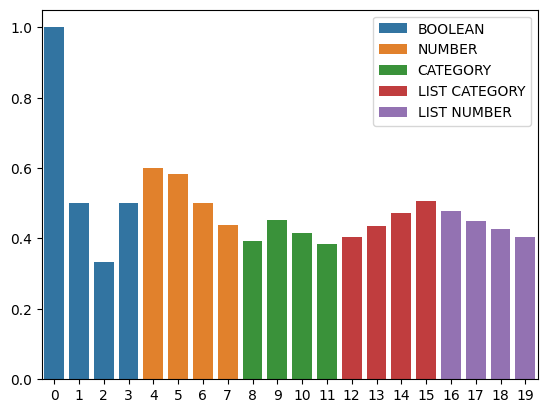

In [ ]:
#ROUGE
import seaborn as sns

ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

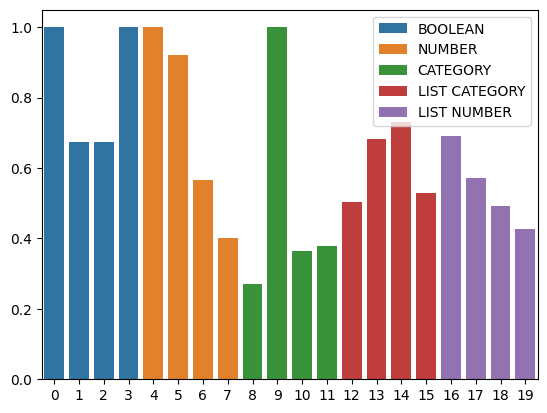

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas**
- Dados: Titanic
- Modelo: mistral-small-latest



In [ ]:
respostas = pd.read_csv("answers/resps_titanic_all_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

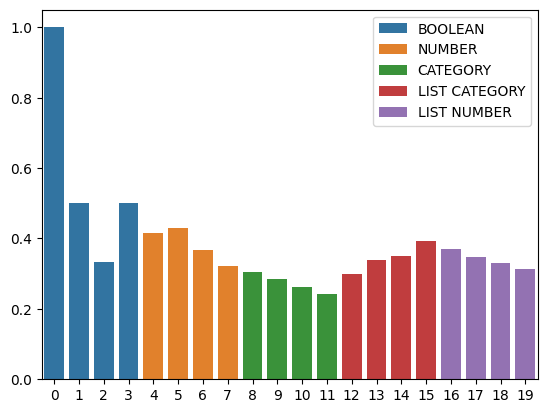

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

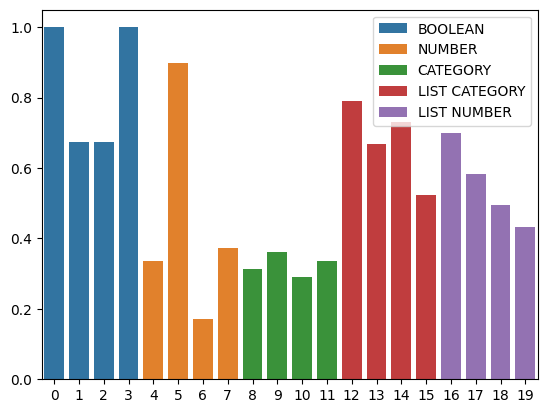

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas**
- Dados: Central
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_central_all_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

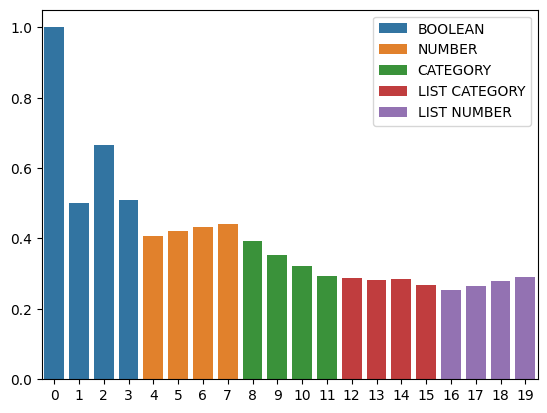

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

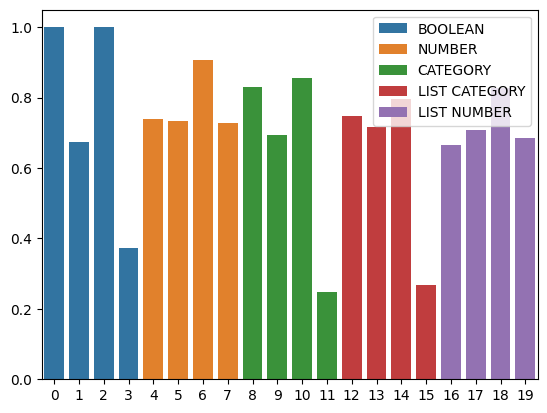

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Central
- Modelo: mistral-small-latest



In [ ]:
respostas = pd.read_csv("answers/resps_central_all_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

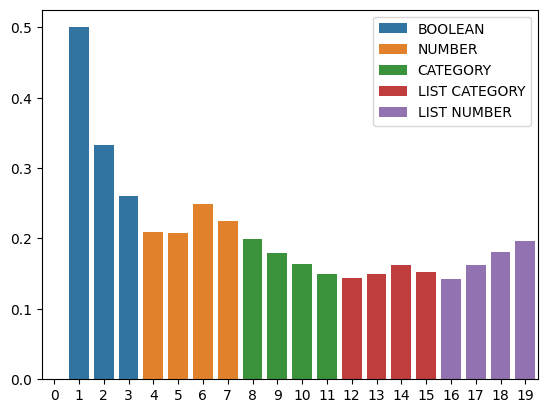

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

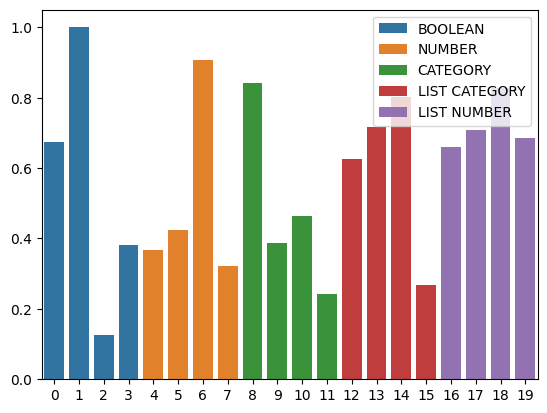

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Holiday
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_holiday_all_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

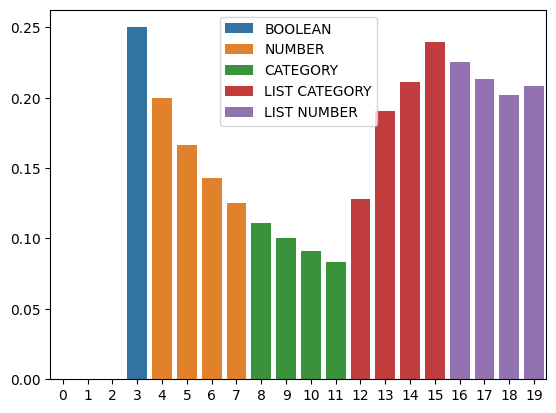

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

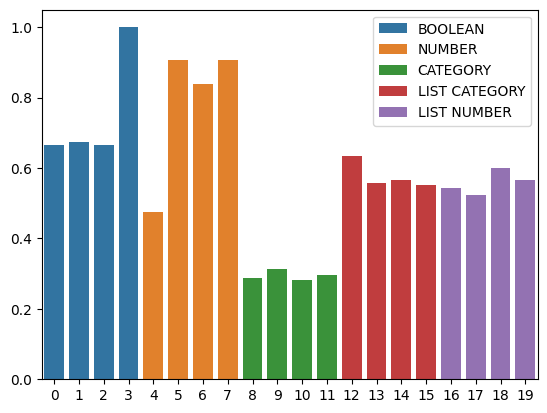

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Holiday
- Modelo: mistral-small-latest



In [ ]:
respostas = pd.read_csv("answers/resps_holiday_all_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

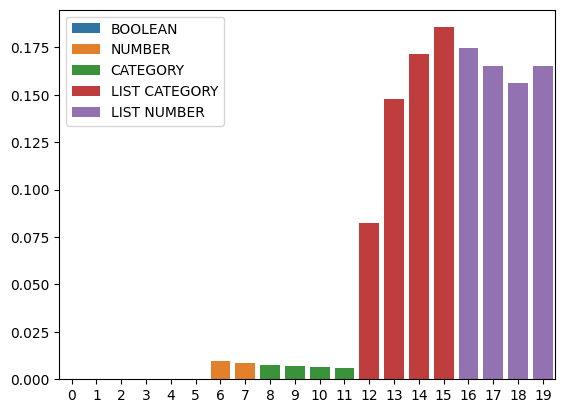

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

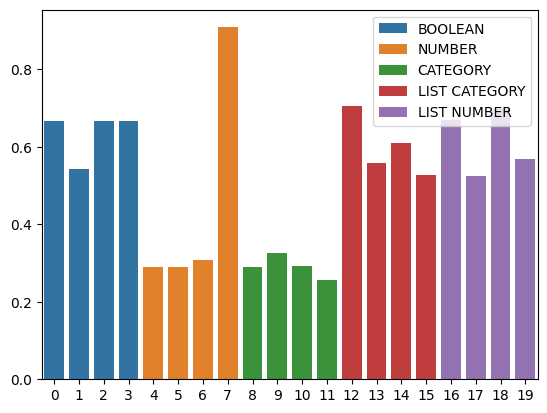

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Disneyland
- Modelo: mistral-large-latest



In [ ]:
respostas = pd.read_csv("answers/resps_disneyland_all_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

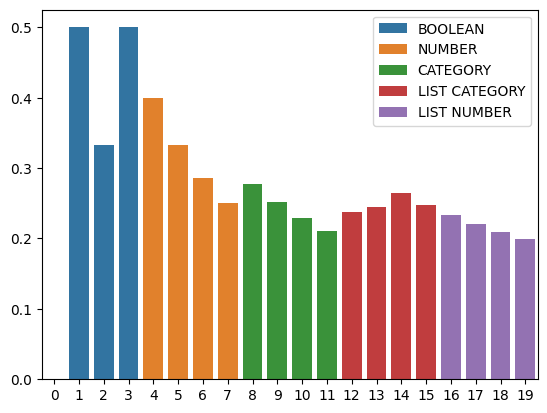

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

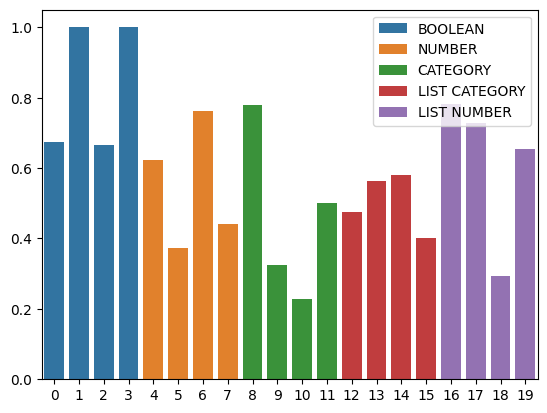

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Disneyland
- Modelo: mistral-small-latest



In [ ]:
respostas = pd.read_csv("answers/resps_disneyland_all_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

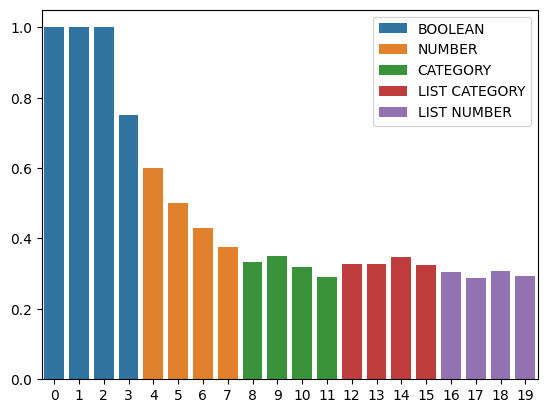

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

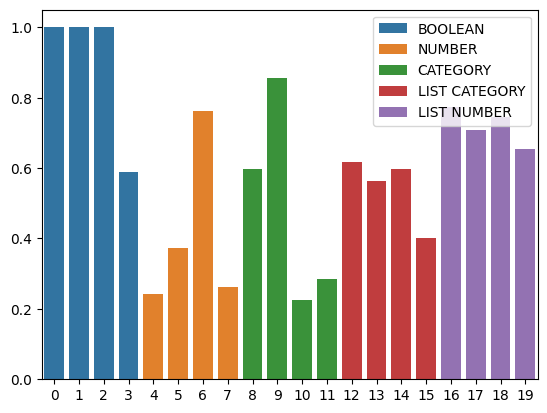

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

# **Análise dos Resultados Obtidos**

In [ ]:
df_resps = pd.read_csv('tbl_resultados.csv', sep = ';')

filtro = df_resps['tarefa'] == 1

df_resps[filtro]

,id,dados,modelo,tarefa,avg rouge p,avg rouge r,avg rouge f1,avg bertscore p,avg bertscore r,avg bertscore f1
0,1,titanic,mistral-large-latest,1,0.388378,0.600000,0.405234,0.646075,0.673573,0.644008
1,2,titanic,mistral-small-latest,1,0.289710,0.600000,0.313525,0.555774,0.615684,0.567834
2,3,central,mistral-large-latest,1,0.288687,0.337778,0.289563,0.717954,0.716402,0.709761
3,4,central,mistral-small-latest,1,0.189109,0.284444,0.196366,0.551872,0.626146,0.571233
4,5,holiday,mistral-large-latest,1,0.225833,0.197262,0.208333,0.617415,0.585246,0.592878
5,6,holiday,mistral-small-latest,1,0.181786,0.200595,0.165115,0.537624,0.518745,0.517935
6,7,disneyland,mistral-large-latest,1,0.238043,0.203929,0.198575,0.625711,0.576253,0.592152
7,8,disneyland,mistral-small-latest,1,0.316667,0.279405,0.293269,0.646811,0.595309,0.612491


<ipython-input-259-a72b3b436493>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Titanic (all)')]

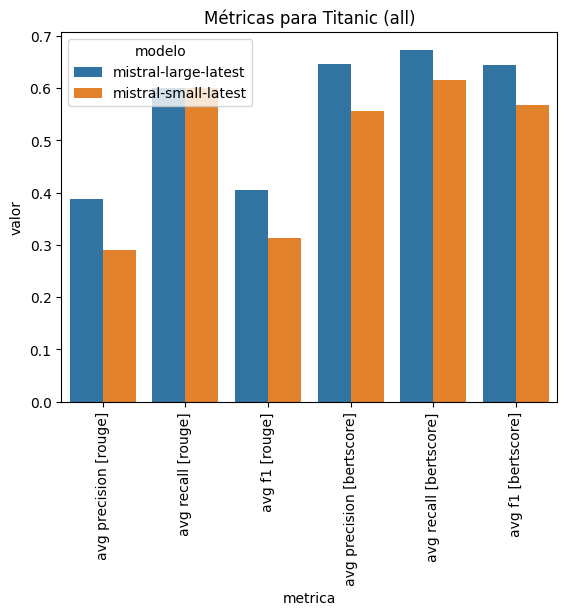

In [ ]:
filtro1 = df['tarefa'] == 1
filtro2 = df['dados'] == 'titanic'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Titanic (all)')

<ipython-input-260-8a759f0ef123>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Central (all)')]

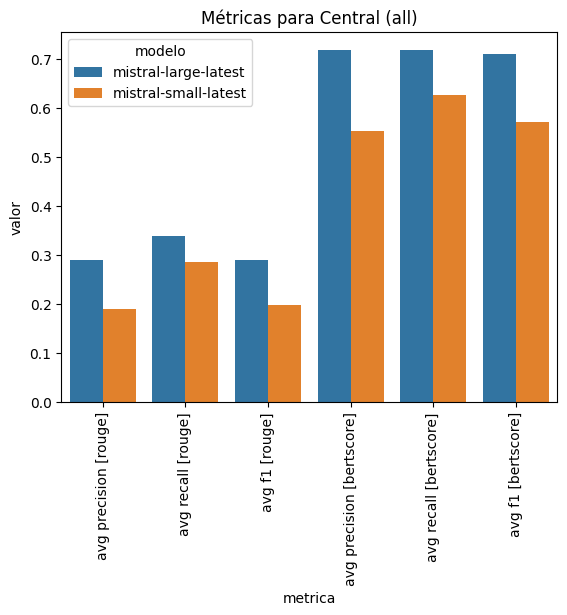

In [ ]:
filtro1 = df['tarefa'] == 1
filtro2 = df['dados'] == 'central'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Central (all)')

<ipython-input-261-58ba951ab766>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Holiday (all)')]

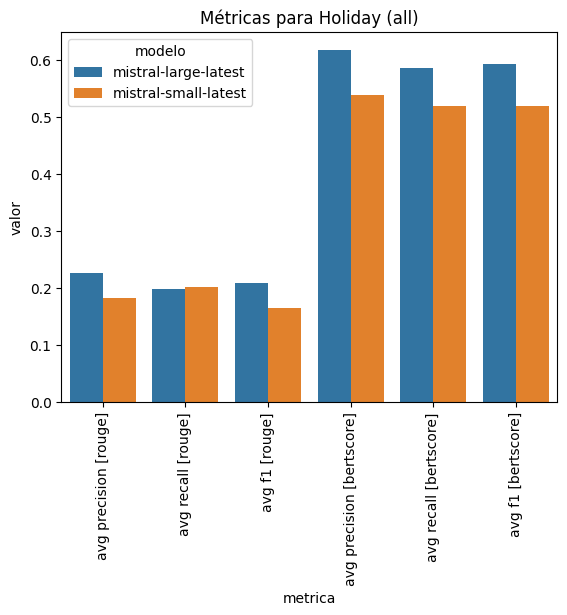

In [ ]:
filtro1 = df['tarefa'] == 1
filtro2 = df['dados'] == 'holiday'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Holiday (all)')

<ipython-input-262-e6d201fd8f71>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Disneyland (all)')]

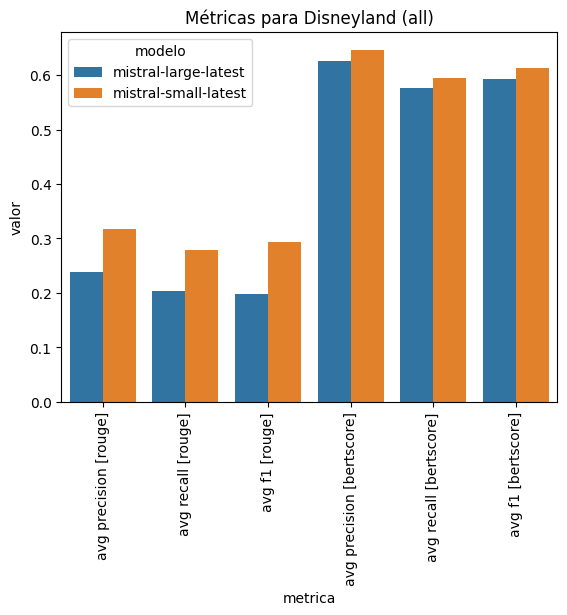

In [ ]:
filtro1 = df['tarefa'] == 1
filtro2 = df['dados'] == 'disneyland'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Disneyland (all)')

## **Avaliações para a Tarefa 2**
(com a versão menor dos datasets)

**Avaliação das Respostas:**
- Dados: Titanic
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_titanic_sample_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

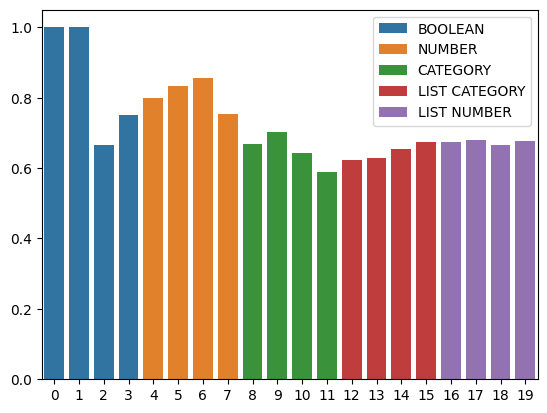

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

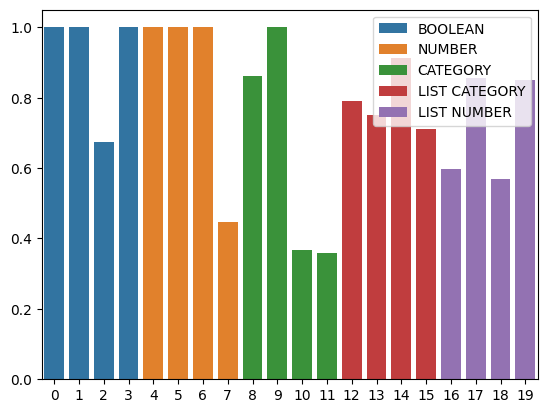

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Titanic
- Modelo: mistral-small-latest

In [ ]:
respostas = pd.read_csv("answers/resps_titanic_sample_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

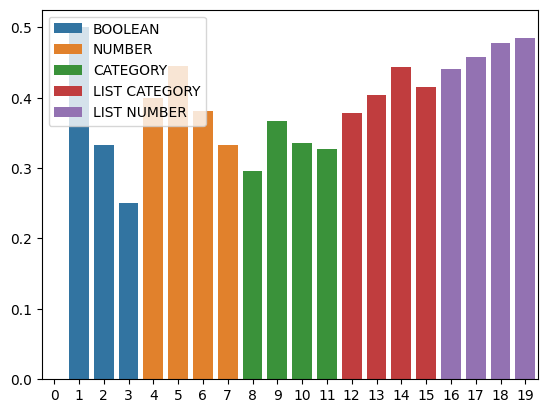

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

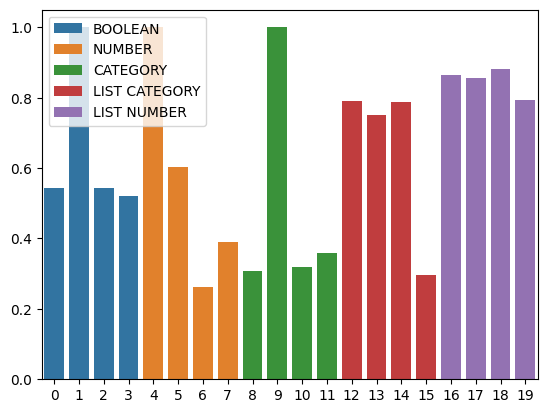

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Central
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_central_sample_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

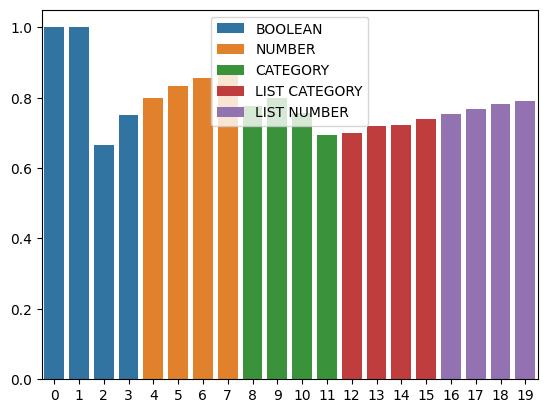

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

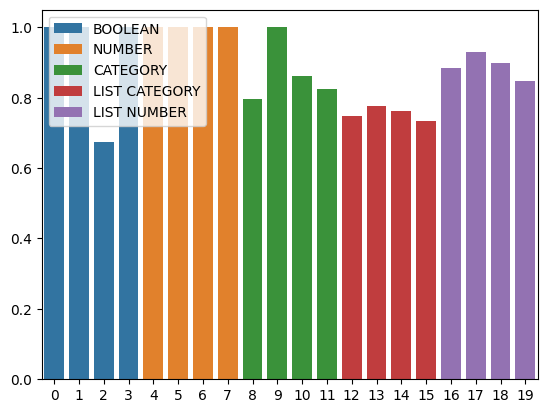

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Central
- Modelo: mistral-small-latest

In [ ]:
respostas = pd.read_csv("answers/resps_central_sample_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

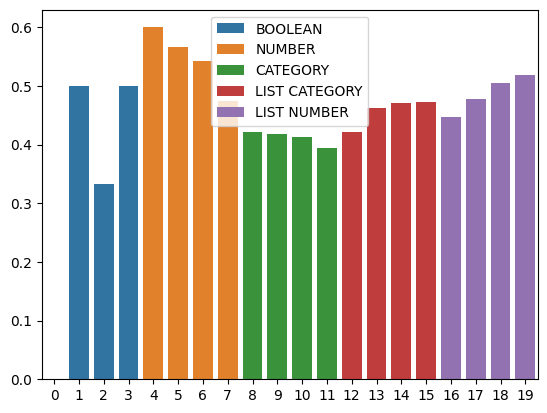

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

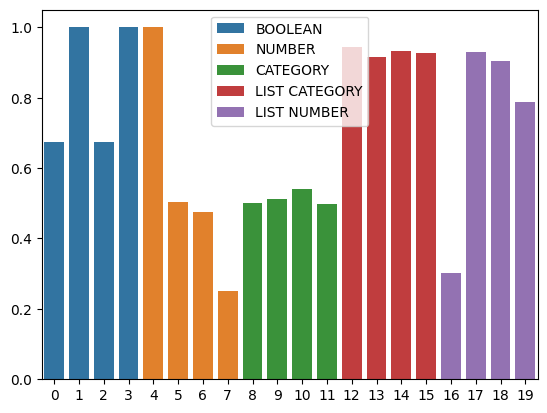

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Holiday
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_holiday_sample_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

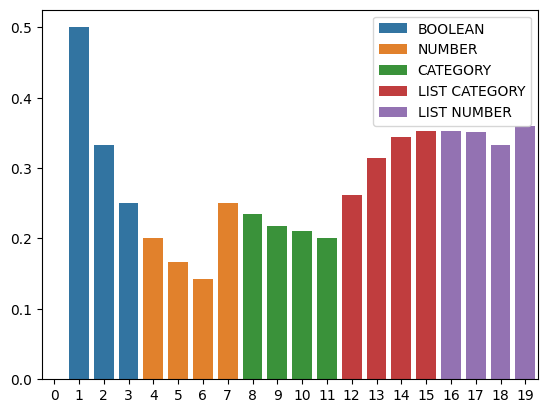

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

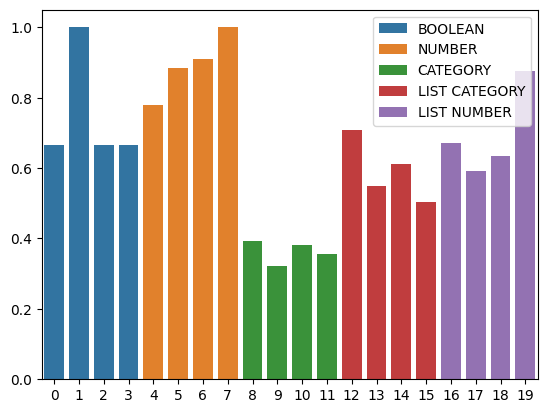

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Holiday
- Modelo: mistral-small-latest

In [ ]:
respostas = pd.read_csv("answers/resps_holiday_sample_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

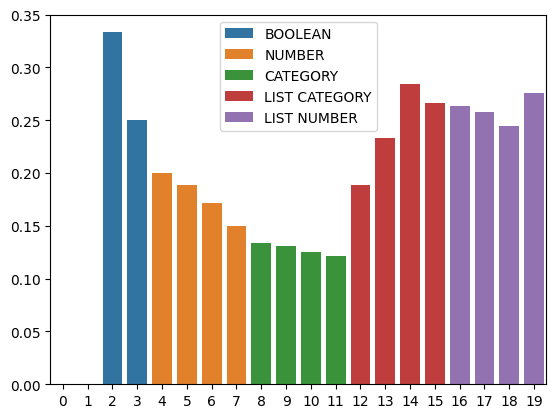

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

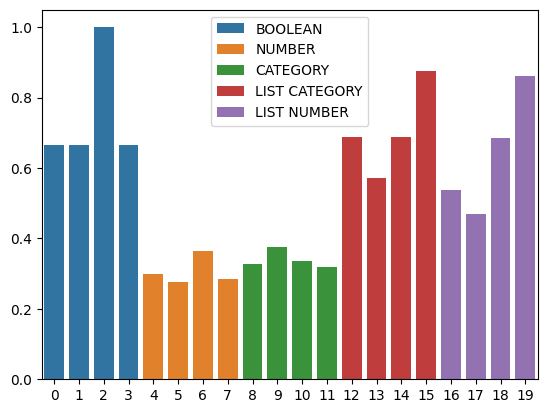

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Disneyland
- Modelo: mistral-large-latest

In [ ]:
respostas = pd.read_csv("answers/resps_disneyland_sample_mlarge.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

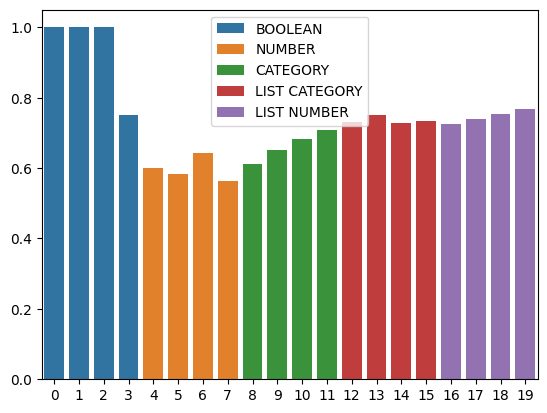

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

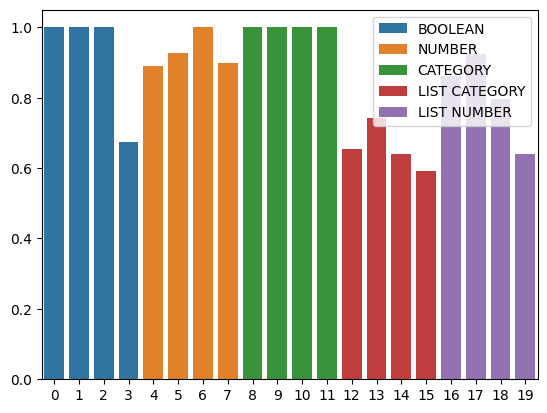

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

**Avaliação das Respostas:**
- Dados: Disneyland
- Modelo: mistral-small-latest

In [ ]:
respostas = pd.read_csv("answers/resps_disneyland_sample_msmall.csv", sep = ";")
list_respostas = respostas["Resposta Modelo"].tolist()
list_correct_answers = respostas["Resposta Correta"].tolist()

avg_rouge_p, avg_rouge_r, avg_rouge_f1, list_rouge_f1 = calc_rouge(list_respostas, list_correct_answers)
avg_bertscore_p, avg_bertscore_r, avg_bertscore_f1, list_bertscore_f1 = calc_bertscore(list_respostas, list_correct_answers)

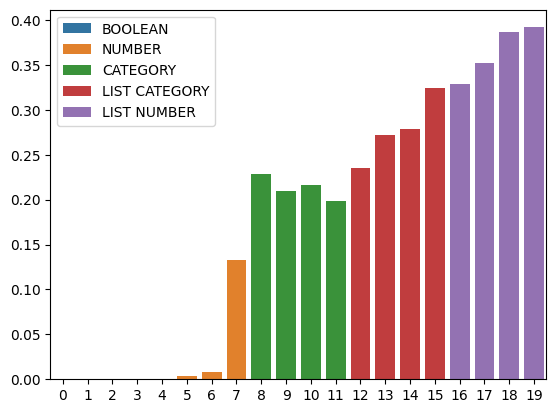

In [ ]:
#ROUGE
ax = sns.barplot(x=np.arange(len(list_rouge_f1)), y=list_rouge_f1, hue=legenda, legend=True)

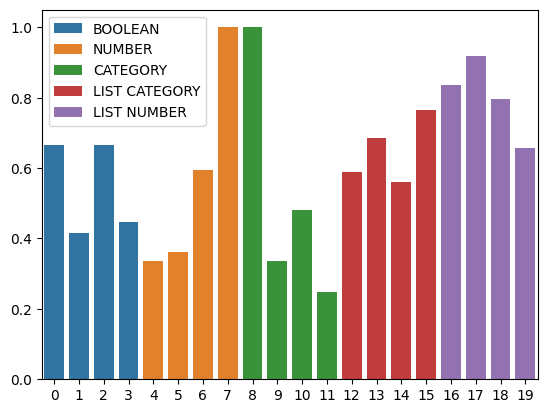

In [ ]:
#BERTScore
ax = sns.barplot(x=np.arange(len(list_bertscore_f1)), y=list_bertscore_f1, hue=legenda, legend=True)

# **Análise dos Resultados Obtidos**

In [ ]:
df_resps = pd.read_csv('/content/tbl_resultados.csv', sep = ';')

filtro = df_resps['tarefa'] == 2

df_resps[filtro]

,id,dados,modelo,tarefa,avg rouge p,avg rouge r,avg rouge f1,avg bertscore p,avg bertscore r,avg bertscore f1
8,9,titanic,mistral-large-latest,2,0.699954,0.787917,0.677173,0.804425,0.790760,0.787468
9,10,titanic,mistral-small-latest,2,0.492467,0.567083,0.484466,0.639765,0.664745,0.643654
10,11,central,mistral-large-latest,2,0.804167,0.784167,0.791667,0.916759,0.862492,0.886815
11,12,central,mistral-small-latest,2,0.496026,0.680000,0.517980,0.686795,0.771363,0.713733
12,13,holiday,mistral-large-latest,2,0.359209,0.440417,0.359708,0.674901,0.654879,0.658050
13,14,holiday,mistral-small-latest,2,0.252812,0.460417,0.276144,0.543391,0.577749,0.547873
14,15,disneyland,mistral-large-latest,2,0.766429,0.766429,0.766429,0.897417,0.835742,0.862059
15,16,disneyland,mistral-small-latest,2,0.374035,0.618214,0.391849,0.612590,0.676870,0.618143


<ipython-input-255-ab017f925cd2>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Titanic (sample)')]

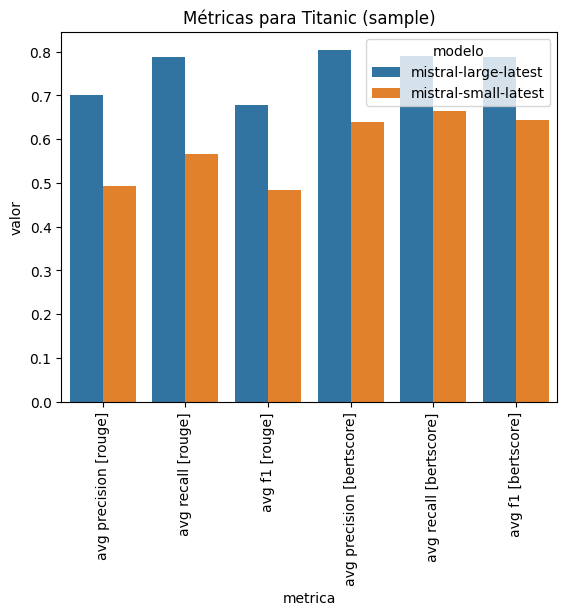

In [ ]:
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('/content/metrics_results.csv', sep = ';')

filtro1 = df['tarefa'] == 2
filtro2 = df['dados'] == 'titanic'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Titanic (sample)')

<ipython-input-256-4918bae91f00>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Central (sample)')]

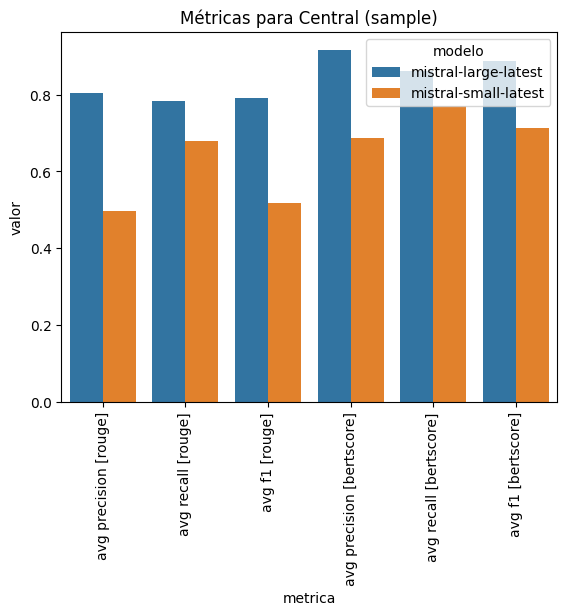

In [ ]:
filtro1 = df['tarefa'] == 2
filtro2 = df['dados'] == 'central'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Central (sample)')

<ipython-input-257-9d7b5482f734>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Holiday (sample)')]

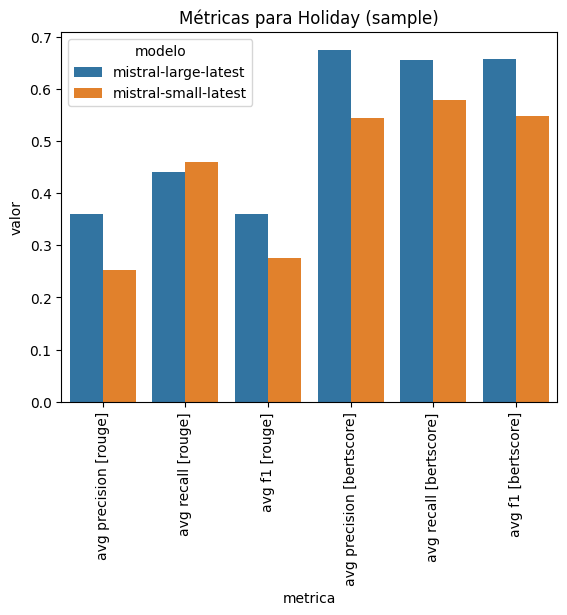

In [ ]:
filtro1 = df['tarefa'] == 2
filtro2 = df['dados'] == 'holiday'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Holiday (sample)')

<ipython-input-258-25377afbd1a5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0.5, 1.0, 'Métricas para Disneyland (sample)')]

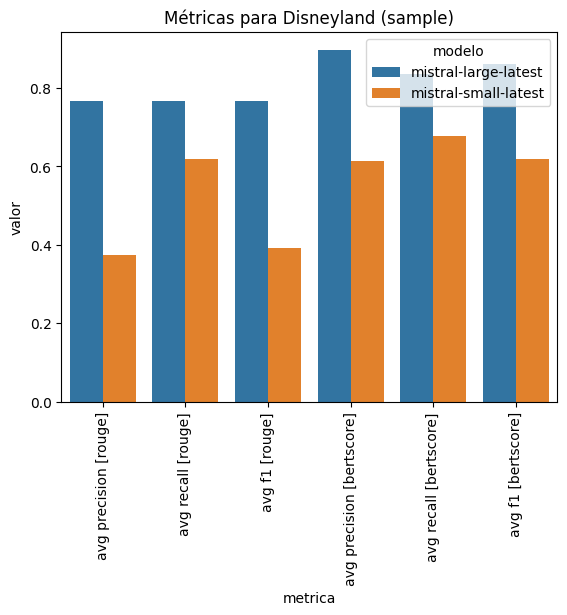

In [ ]:
filtro1 = df['tarefa'] == 2
filtro2 = df['dados'] == 'disneyland'

g = sns.barplot(x = 'metrica',
            y = 'valor',
            hue = 'modelo',
            data = df[filtro1 & filtro2])

g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(title = 'Métricas para Disneyland (sample)')